In [3]:
## PRE-PROCESSING

## IMPORTING PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Project_Library as pl
print('packages imported')


## IMPORTING DATASETS - FROM st1 to st10
for i in range(1, 11):
    globals()[f'df{i}'] = pd.read_csv(f'Data/st{i}.csv', parse_dates=['Date'], index_col='Date')
print('datasets imported')


## CREATING TARGET COLUMN
stocks_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
stocks_list = pl.create_target_column(stocks_list)



packages imported
datasets imported
Target columns created for all stocks


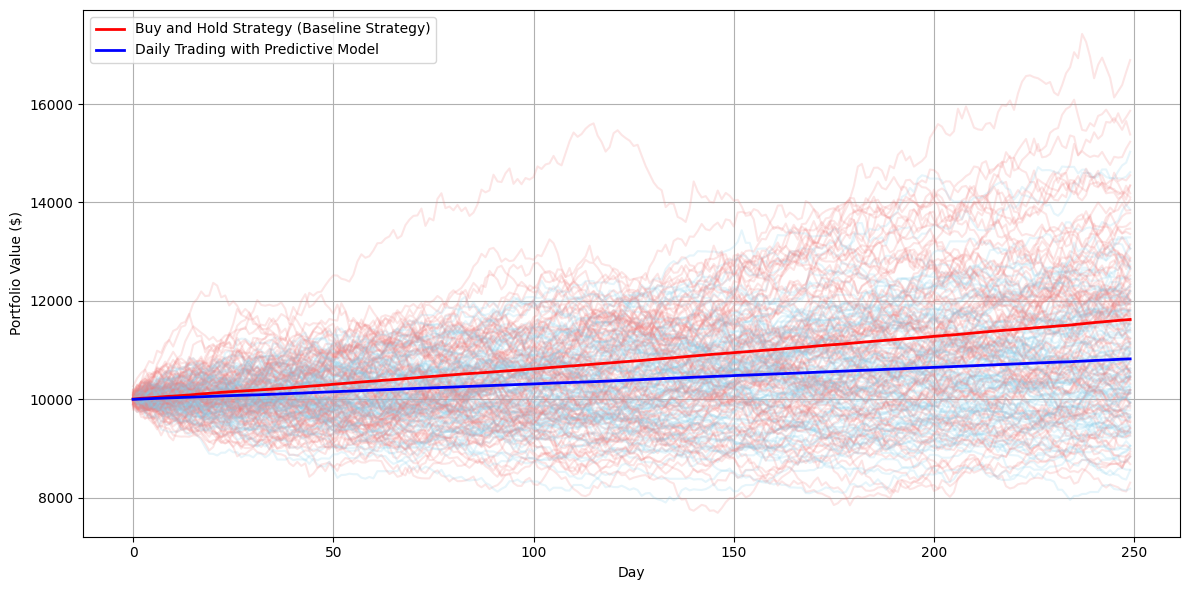

Daily Trading with Predictive Model (Decision Making Tool):
Expected Final Portfolio Value: $10,821.79
Expected Yearly Rate of Return: 8.22%
5th Percentile (5% of returns are below:): $8,811.59
95th Percentile (95% of returns are above:): $13,132.24
Annualized Volatility: 13.23%
Sharpe Ratio: 0.621

Buy and Hold Strategy (Baseline Investment):
Expected Final Portfolio Value: $11,622.51
Expected Yearly Rate of Return: 16.23%
5th Percentile (5% of returns are below:): $8,720.01
95th Percentile (95% of returns are above:): $15,111.12
Annualized Volatility: 19.68%
Sharpe Ratio: 0.824


In [4]:
## SIMULATION ##

# --- PARAMETERS AND SETUP ---
initial_investment = 10000
trading_days = 250
n_simulations = 10000

# Prediction model probabilities (model confidence that stock will go up)
predict_probs = np.array([0.5266, 0.5367, 0.5331])  # Stock6, Stock9, Stock10

# Expected return and volatility from the optimal portfolio using Efficient Frontier & Sharpe Ratio.
mean_return = 0.0006  # 0.06% daily return
volatility = 0.0148   # 1.47% daily volatility

# Stock weights from the optimal portfolio using Efficient Frontier & Sharpe Ratio.
optimal_weights = np.array([0.6042, 0.0169, 0.3789])

# Simulated daily price paths
simulated_paths = np.zeros((n_simulations, trading_days))
baseline_paths = np.zeros((n_simulations, trading_days))

np.random.seed(42)

for sim in range(n_simulations):
    # Initialize values
    funds_tool = initial_investment * optimal_weights  # Separate fund for each stock
    cash_tool = funds_tool.copy()  # Cash available in each fund
    holdings_tool = np.zeros(3)  # Shares held per stock

    portfolio_value_baseline = initial_investment
    holdings_baseline = initial_investment * optimal_weights  # Baseline buy-and-hold

    tool_values = []
    baseline_values = []

    # Initialize prices (starting at 100 for simplicity)
    prices = np.array([100.0, 100.0, 100.0])

    for day in range(trading_days):
        # --- SIMULATE PRICE MOVEMENT ---
        # Generate daily return from normal distribution
        daily_returns = np.random.normal(mean_return, volatility, 3)
        prices *= (1 + daily_returns)

        # --- DECISION-MAKING TOOL STRATEGY ---
        stock_signals = np.random.random(3) < predict_probs

        for i in range(3):
            if stock_signals[i]:
                if holdings_tool[i] == 0:
                    shares_to_buy = cash_tool[i] / prices[i]
                    holdings_tool[i] = shares_to_buy
                    cash_tool[i] = 0
            else:
                if holdings_tool[i] > 0:
                    cash_tool[i] += holdings_tool[i] * prices[i]
                    holdings_tool[i] = 0

        tool_portfolio_value = np.sum(cash_tool + holdings_tool * prices)
        tool_values.append(tool_portfolio_value)

        # --- BASELINE STRATEGY ---
        holdings_baseline *= (1 + daily_returns)
        baseline_portfolio_value = np.sum(holdings_baseline)
        baseline_values.append(baseline_portfolio_value)

    simulated_paths[sim, :] = tool_values
    baseline_paths[sim, :] = baseline_values

# --- PLOTTING RESULTS ---
plt.figure(figsize=(12, 6))
for i in range(min(100, n_simulations)):
    plt.plot(simulated_paths[i], color='skyblue', alpha=0.2)
    plt.plot(baseline_paths[i], color='lightcoral', alpha=0.2)

# Add average path across all simulations
plt.plot(np.mean(baseline_paths, axis=0), color='red', linewidth=2, label='Buy and Hold Strategy (Baseline Strategy)')
plt.plot(np.mean(simulated_paths, axis=0), color='blue', linewidth=2, label='Daily Trading with Predictive Model')

##plt.title('Simulated Portfolio Value Over 1 Year (250 Trading Days with Optimized Weighting)')
plt.xlabel('Day')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- FINAL STATISTICS ---
final_values_tool = simulated_paths[:, -1]
final_values_baseline = baseline_paths[:, -1]

# Calculate yearly rate of return
mean_final_tool = np.mean(final_values_tool)
mean_final_baseline = np.mean(final_values_baseline)

return_tool = ((mean_final_tool / initial_investment) - 1) * 100
return_baseline = ((mean_final_baseline / initial_investment) - 1) * 100

# Calculate annualized volatility
annual_vol_tool = np.std(final_values_tool / initial_investment - 1) * np.sqrt(1)
annual_vol_baseline = np.std(final_values_baseline / initial_investment - 1) * np.sqrt(1)

# Sharpe Ratio Calculation (assuming risk-free rate = 4%)
risk_free_rate = 0.00  # 0%
sharpe_tool = (return_tool / 100 - risk_free_rate) / annual_vol_tool
sharpe_baseline = (return_baseline / 100 - risk_free_rate) / annual_vol_baseline

print(f"Daily Trading with Predictive Model (Decision Making Tool):")
print(f"Expected Final Portfolio Value: ${mean_final_tool:,.2f}")
print(f"Expected Yearly Rate of Return: {return_tool:.2f}%")
print(f"5th Percentile (5% of returns are below:): ${np.percentile(final_values_tool, 5):,.2f}")
print(f"95th Percentile (95% of returns are above:): ${np.percentile(final_values_tool, 95):,.2f}")
print(f"Annualized Volatility: {annual_vol_tool * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_tool:.3f}")

print(f"\nBuy and Hold Strategy (Baseline Investment):")
print(f"Expected Final Portfolio Value: ${mean_final_baseline:,.2f}")
print(f"Expected Yearly Rate of Return: {return_baseline:.2f}%")
print(f"5th Percentile (5% of returns are below:): ${np.percentile(final_values_baseline, 5):,.2f}")
print(f"95th Percentile (95% of returns are above:): ${np.percentile(final_values_baseline, 95):,.2f}")
print(f"Annualized Volatility: {annual_vol_baseline * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_baseline:.3f}")
